# EDA


In [19]:
# All imports happen here for reproducibility.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer



# Plot style for consistent visuals (English labels only).
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["axes.titlesize"] = 13
plt.rcParams["xtick.labelsize"] = 11
plt.rcParams["ytick.labelsize"] = 11
sns.set(style="whitegrid")
print("Libraries imported successfully.")


Libraries imported successfully.


In [20]:
# Load the Breast Cancer Wisconsin (Diagnostic) dataset as a pandas DataFrame.
# This directly loads data; no local file I/O is used.
data_bunch = load_breast_cancer(as_frame=True)
X = data_bunch.data.copy()
y = pd.Series(data_bunch.target, name="target")  # 0 = malignant, 1 = benign
df = pd.concat([X, y], axis=1)

print("Dataset loaded from scikit-learn.")
print(f"Shape: {df.shape}")
print("Target meaning: 0 = malignant, 1 = benign")


Dataset loaded from scikit-learn.
Shape: (569, 31)
Target meaning: 0 = malignant, 1 = benign


In [12]:
# Show the first few rows to understand the structure.
print("Head of the dataframe (first 5 rows):")
display(df.head())

print("\nColumns overview:")
print(df.columns.tolist())


Head of the dataframe (first 5 rows):


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0



Columns overview:
['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension', 'target']


In [21]:
# Info and describe help verify dtypes and basic stats.
print("DataFrame info:")
display(df.info())

print("\nDescriptive statistics of features:")
display(X.describe().T)

# Class distribution
class_counts = y.value_counts().rename(index={0: "malignant", 1: "benign"})
print("\nClass distribution (count):")
display(class_counts)

print("\nClass distribution (percentage):")
display((class_counts / class_counts.sum() * 100).round(2))


DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness

None


Descriptive statistics of features:


,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744



Class distribution (count):


,count
target,
benign,357
malignant,212



Class distribution (percentage):


,count
target,
benign,62.74
malignant,37.26


In [22]:
# The sklearn diagnostic dataset has no missing values by design,
# but we still check to keep the workflow consistent.
dup_count = df.duplicated().sum()
na_count = df.isna().sum().sum()

print(f"Number of duplicated rows: {dup_count}")
print(f"Total number of missing values across all cells: {na_count}")


Number of duplicated rows: 0
Total number of missing values across all cells: 0


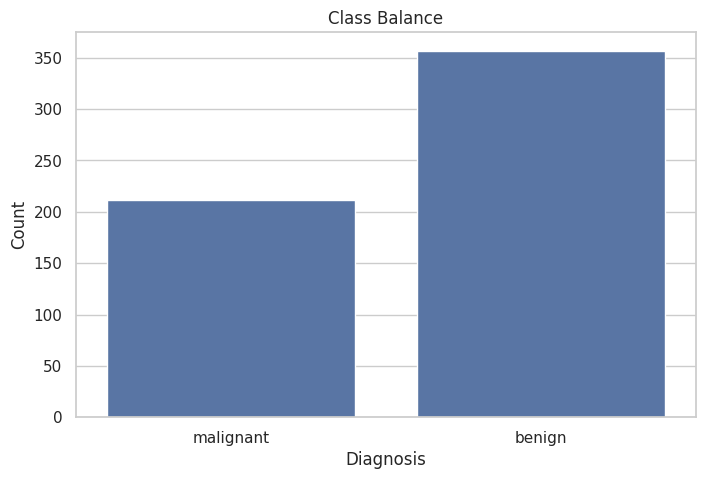

In [23]:
# Visualize class balance.
ax = sns.countplot(x=y.map({0: "malignant", 1: "benign"}))
ax.set_title("Class Balance")
ax.set_xlabel("Diagnosis")
ax.set_ylabel("Count")
plt.show()


Plotting distributions for selected features...


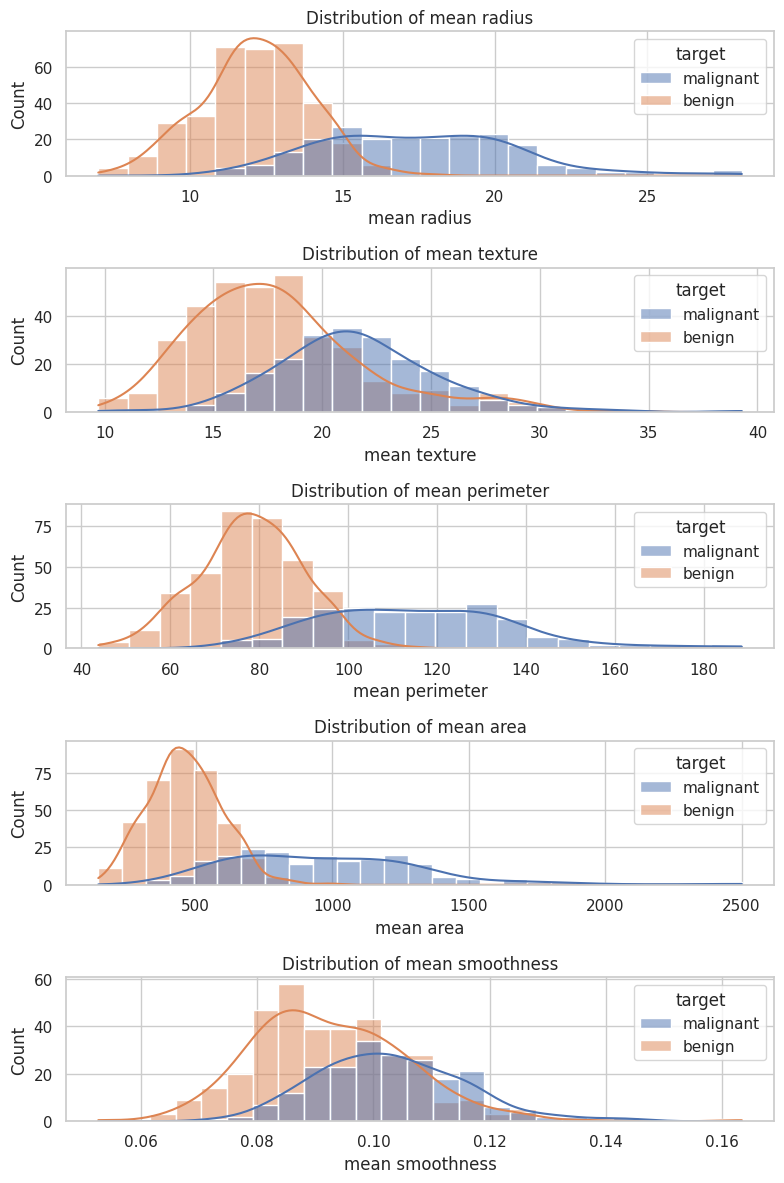

In [24]:
# Plot distributions for a small set of representative features to keep the notebook tidy.
selected_features = [
    "mean radius", "mean texture", "mean perimeter",
    "mean area", "mean smoothness"
]

print("Plotting distributions for selected features...")
fig, axes = plt.subplots(nrows=len(selected_features), ncols=1, figsize=(8, 12))
for ax, col in zip(axes, selected_features):
    sns.histplot(data=df, x=col, hue=y.map({0: "malignant", 1: "benign"}), kde=True, ax=ax)
    ax.set_title(f"Distribution of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
plt.tight_layout()
plt.show()


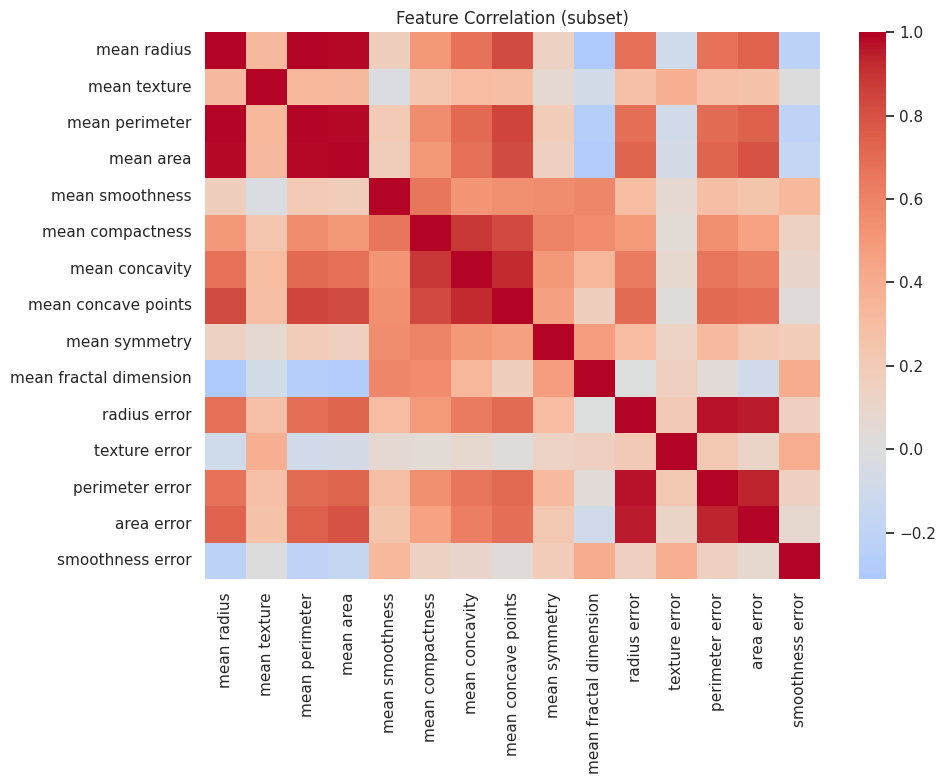

In [25]:
# Since 'target' is binary, we can inspect feature correlations among features themselves.
# For full heatmaps, we subset to avoid overly large figures.
corr = X.corr()
# Choose a set of highly inter-correlated features to visualize (by variance or name)
subset = X.columns[:15]
plt.figure(figsize=(10, 8))
sns.heatmap(corr.loc[subset, subset], annot=False, cmap="coolwarm", center=0, square=False)
plt.title("Feature Correlation (subset)")
plt.tight_layout()
plt.show()


# PCA

In [26]:
# ---- Imports ----
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score


In [3]:
# ---- 1) Load dataset into a DataFrame ----
# The sklearn loader returns a dict-like Bunch with data, target, and metadata.
cancer = load_breast_cancer()
X = pd.DataFrame(cancer["data"], columns=cancer["feature_names"])
y = pd.Series(cancer["target"], name="y")  # 0 = malignant, 1 = benign in sklearn

# Optionally, build one DataFrame with features + target for convenience.
data = X.copy()
data["y"] = y

# Peek at the first few rows to confirm structure
data.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
# ---- 2) PCA on the full feature set (standardize first) ----
# Standardization is important because PCA is variance-based and
# features with larger natural scales would dominate otherwise.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA on all standardized features.
# We can keep as many components as there are features;
# for visualization we will only use the first two.
pca_full = PCA(n_components=min(X.shape[1], X.shape[0]))
PCs_full = pca_full.fit_transform(X_scaled)

# Extract the first two principal components for plotting.
pc1 = PCs_full[:, 0]
pc2 = PCs_full[:, 1]

# Show the explained variance ratio of the first few PCs for a quick check
pca_full.explained_variance_ratio_[:5]


array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768])

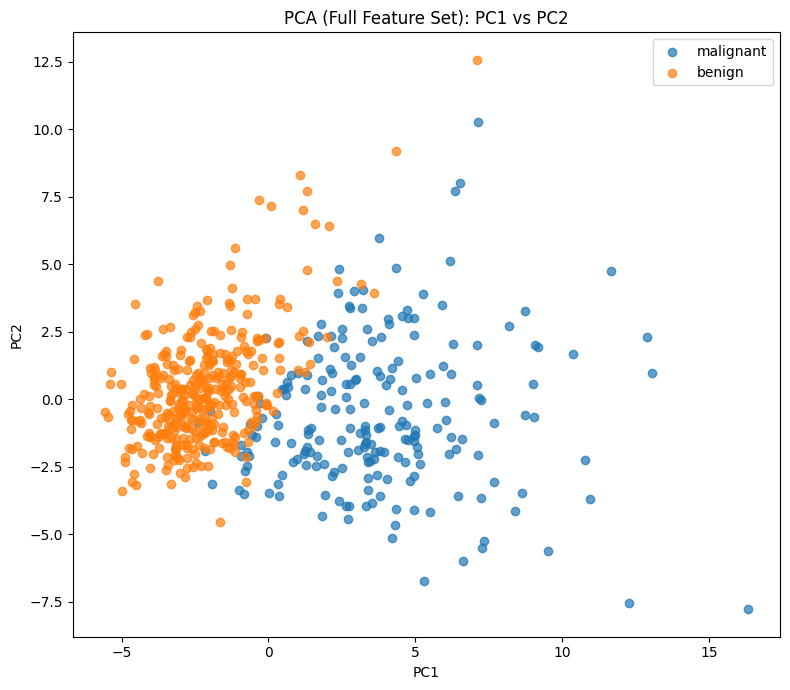

In [5]:
# ---- 3) Scatter plot of PC1 vs PC2 (full feature set) ----
plt.figure(figsize=(8, 7))
# Color-code by class: 0 = malignant, 1 = benign
plt.scatter(pc1[y == 0], pc2[y == 0], alpha=0.7, label="malignant")
plt.scatter(pc1[y == 1], pc2[y == 1], alpha=0.7, label="benign")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA (Full Feature Set): PC1 vs PC2")
plt.legend()
plt.tight_layout()
plt.show()


show different pattern(two splited clear custer)--good for SVM

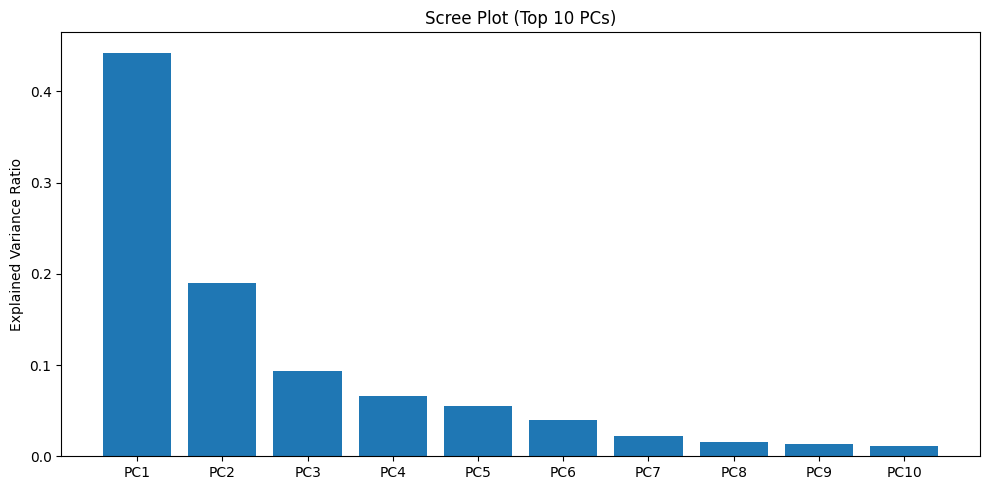

In [6]:
# ---- 4) Scree plot (explained variance ratio for top components) ----
# Display the first 10 to mirror a typical scree overview.
top_k = 10
evr = pca_full.explained_variance_ratio_[:top_k]
labels = [f"PC{i}" for i in range(1, top_k + 1)]

plt.figure(figsize=(10, 5))
plt.bar(labels, evr)
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot (Top 10 PCs)")
plt.tight_layout()
plt.show()


In [7]:
# ---- 5) Define two feature groups for comparison ----
# These names match sklearn's feature naming for this dataset.
# Group 1: symmetry and smoothness related features
group_1 = [
    "mean symmetry", "symmetry error", "worst symmetry",
    "mean smoothness", "smoothness error", "worst smoothness",
]

# Group 2: perimeter and concavity related features
group_2 = [
    "mean perimeter", "perimeter error", "worst perimeter",
    "mean concavity", "concavity error", "worst concavity",
]

groups = [group_1, group_2]
group_names = ["Group 1 (Symmetry + Smoothness)", "Group 2 (Perimeter + Concavity)"]

group_1, group_2


(['mean symmetry',
  'symmetry error',
  'worst symmetry',
  'mean smoothness',
  'smoothness error',
  'worst smoothness'],
 ['mean perimeter',
  'perimeter error',
  'worst perimeter',
  'mean concavity',
  'concavity error',
  'worst concavity'])

In [8]:
def pca_scatter_for_group(df, target, features, title_suffix):
    """
    Standardize the selected columns, fit PCA, and plot PC1 vs PC2.
    This function is for quick visual comparison of separability
    using only the feature subset.
    """
    Xg = df[features].values
    Xg_scaled = StandardScaler().fit_transform(Xg)
    pca_g = PCA(n_components=min(Xg.shape[1], Xg.shape[0]))
    PCs_g = pca_g.fit_transform(Xg_scaled)

    plt.figure(figsize=(8, 7))
    plt.scatter(PCs_g[target == 0, 0], PCs_g[target == 0, 1], alpha=0.7, label="malignant")
    plt.scatter(PCs_g[target == 1, 0], PCs_g[target == 1, 1], alpha=0.7, label="benign")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title(f"PCA (Subset): PC1 vs PC2 — {title_suffix}")
    plt.legend()
    plt.tight_layout()
    plt.show()


def evaluate_logistic_for_group(df, target, features, test_size=0.3, random_state=42):
    """
    Build a simple pipeline: StandardScaler -> LogisticRegression,
    perform a train/test split, and return accuracy on the test set.
    """
    Xg = df[features].values
    yg = target.values

    X_train, X_test, y_train, y_test = train_test_split(
        Xg, yg, test_size=test_size, random_state=random_state, stratify=yg
    )

    pipe = Pipeline(steps=[
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=1000, solver="lbfgs"))
    ])
    pipe.fit(X_train, y_train)
    pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, pred)
    return acc


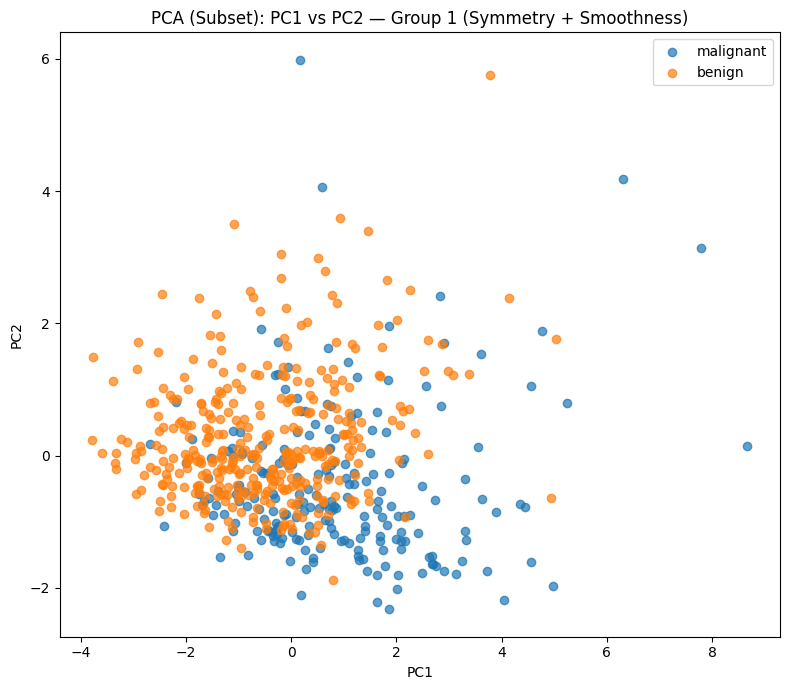

Accuracy of Group 1 (Symmetry + Smoothness): 0.690


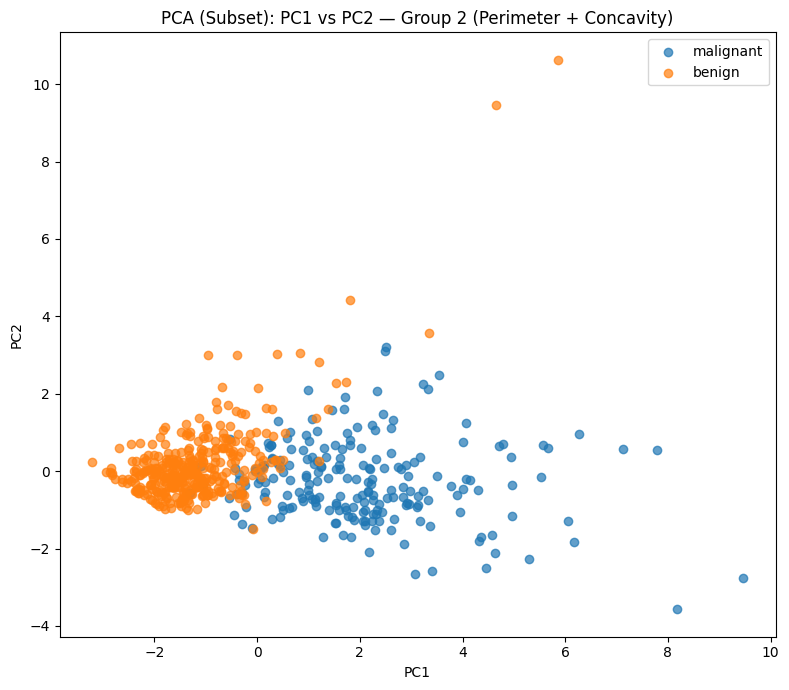

Accuracy of Group 2 (Perimeter + Concavity): 0.936


In [9]:
# ---- Run comparisons for each feature group ----
for name, g in zip(group_names, groups):
    # PCA scatter for the subset
    pca_scatter_for_group(data, y, g, name)

    # Train/test a Logistic Regression on the subset and report accuracy
    acc = evaluate_logistic_for_group(data, y, g)
    print(f"Accuracy of {name}: {acc:.3f}")


why group2 better?- medical explaination

which model to train?-random forest\logistic regression(SVM)